In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
df = pd.read_csv('/content/sample_data/world_cup_2023.csv')

      runs             wkts              econ          
       sum       mean   sum      mean     sum      mean
team                                                   
AFG   4134  32.046512  53.0  0.963636  317.01  5.763818
AUS   5234  33.767742  77.0  1.241935  350.99  5.661129
BAN   4358  30.907801  51.0  0.980769  316.98  6.095769
ENG   4396  29.112583  65.0  1.226415  321.62  6.068302
IND   4783  38.572581  94.0  1.620690  287.90  4.963793
NED   4268  27.184713  63.0  1.067797  364.05  6.170339
NZ    5376  37.333333  71.0  1.126984  392.94  6.237143
PAK   4786  37.390625  65.0  1.250000  326.92  6.286923
SA    5097  36.148936  88.0  1.629630  306.87  5.682778
SL    4366  31.637681  50.0  0.925926  356.73  6.606111


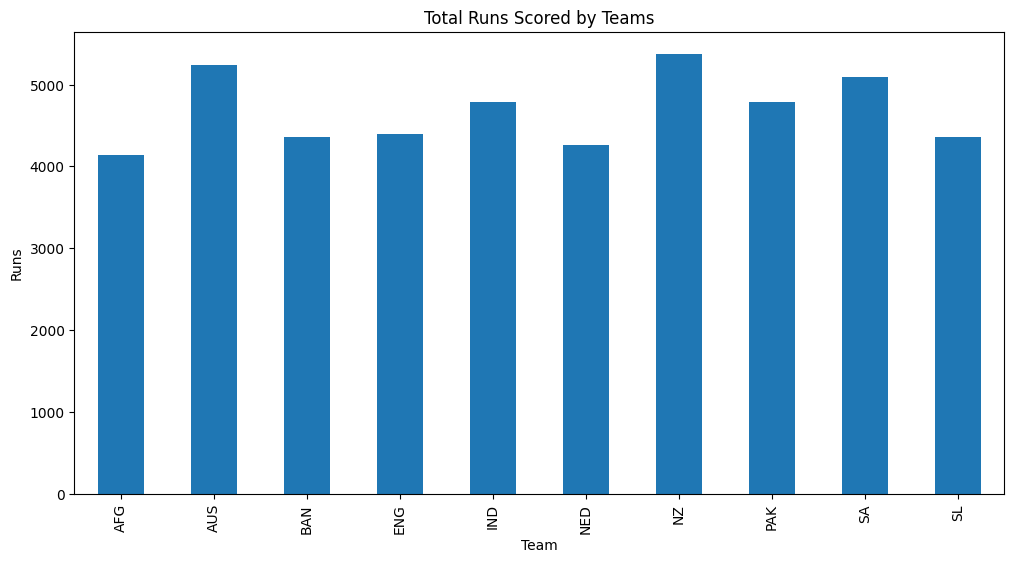

In [14]:
# 1. Team Performance Analysis
# Explore team-wise performance metrics
team_stats = df.groupby('team')[['runs', 'wkts', 'econ']].agg(['sum', 'mean'])
print(team_stats)

# Visualize team performance
plt.figure(figsize=(12, 6))
team_stats['runs']['sum'].plot(kind='bar', title='Total Runs Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Runs')
plt.show()

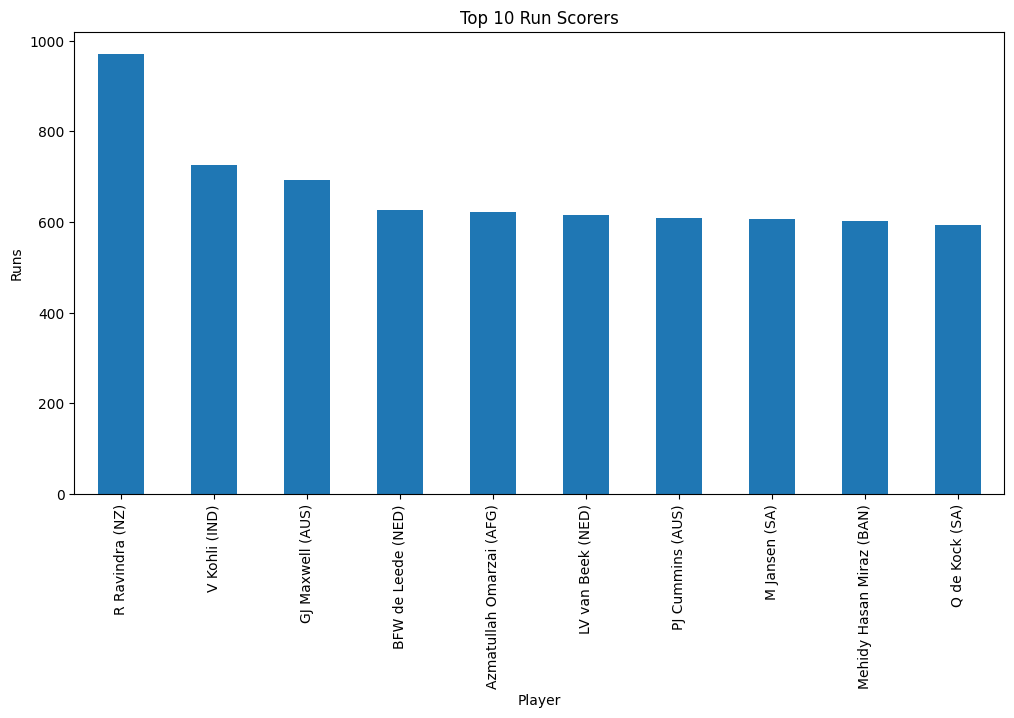

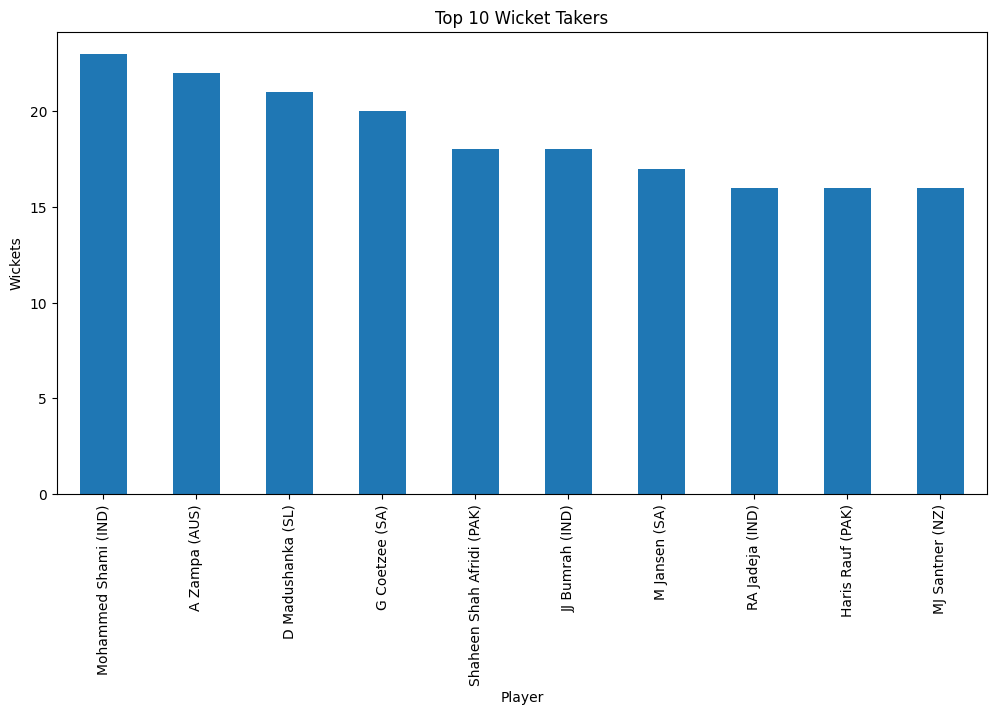

In [15]:
# 2. Player Performance Analysis
# Evaluate individual player statistics
player_stats = df.groupby('player')[['runs', 'wkts', 'sr', 'econ']].agg(['sum', 'mean'])

# Identify leading run-scorers and wicket-takers
top_run_scorers = player_stats.sort_values(by=('runs', 'sum'), ascending=False).head(10)
top_wicket_takers = player_stats.sort_values(by=('wkts', 'sum'), ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_run_scorers['runs']['sum'].plot(kind='bar', title='Top 10 Run Scorers')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.show()

plt.figure(figsize=(12, 6))
top_wicket_takers['wkts']['sum'].plot(kind='bar', title='Top 10 Wicket Takers')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

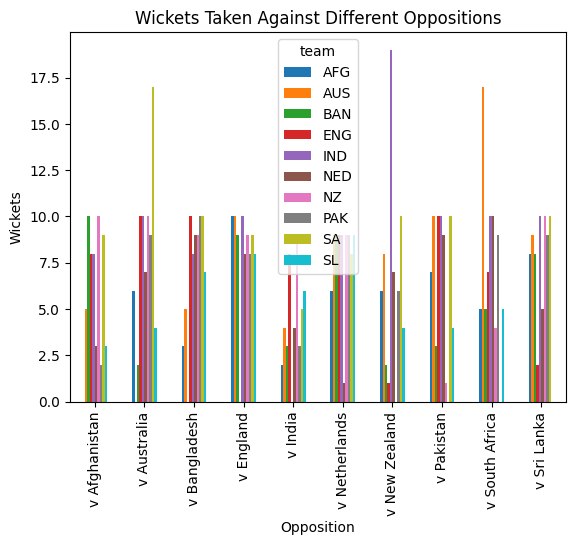

<Figure size 1200x600 with 0 Axes>

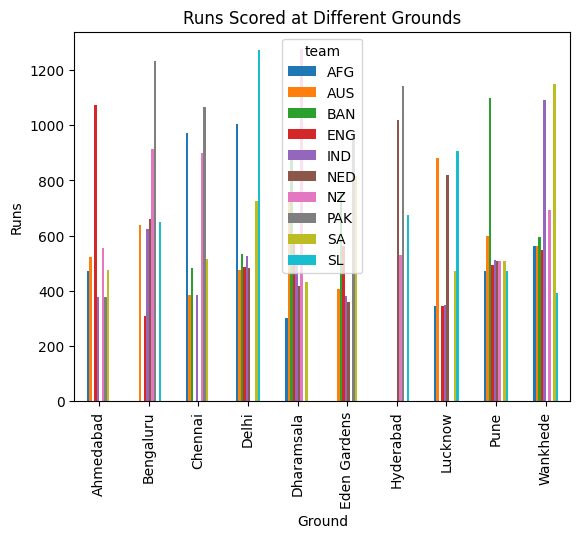

<Figure size 1200x600 with 0 Axes>

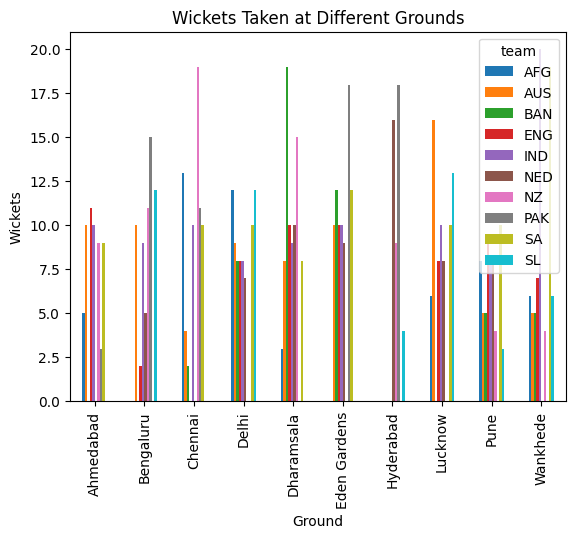

In [16]:
# 3. Opposition and Ground Analysis
# Investigate performance against different oppositions
opposition_stats = df.groupby(['opposition', 'team'])[['runs', 'wkts']].agg(['sum'])
plt.figure(figsize=(12, 6))
# Investigate performance against different oppositions
opposition_stats = df.groupby(['opposition', 'team'])[['runs', 'wkts']].agg(['sum'])

# Create heatmap for runs scored against different oppositions
plt.figure

plt.figure(figsize=(12, 6))
opposition_stats[('wkts', 'sum')].unstack().plot(kind='bar', title='Wickets Taken Against Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Wickets')
plt.show()

plt.figure(figsize=(12, 6))
ground_stats[('runs', 'sum')].unstack().plot(kind='bar', title='Runs Scored at Different Grounds')
plt.xlabel('Ground')
plt.ylabel('Runs')
plt.show()

plt.figure(figsize=(12, 6))
ground_stats[('wkts', 'sum')].unstack().plot(kind='bar', title='Wickets Taken at Different Grounds')
plt.xlabel('Ground')
plt.ylabel('Wickets')
plt.show()

<ipython-input-17-ce82b308acc3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


<Figure size 1200x600 with 0 Axes>

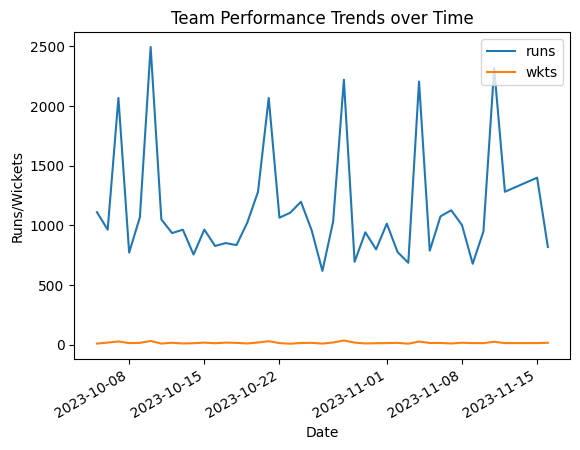

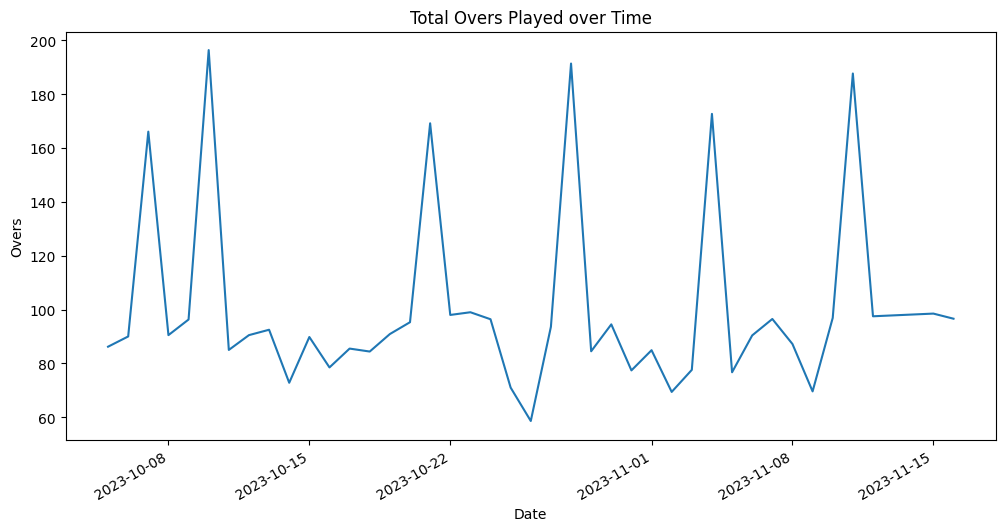

In [17]:
# 4. Temporal Analysis
# Study performance trends over time
df['start_date'] = pd.to_datetime(df['start_date'])
df['overs'] = df['overs'].astype(float)

# Plot performance trends
plt.figure(figsize=(12, 6))
df.groupby('start_date')[['runs', 'wkts']].sum().plot()
plt.title('Team Performance Trends over Time')
plt.xlabel('Date')
plt.ylabel('Runs/Wickets')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('start_date')['overs'].sum().plot()
plt.title('Total Overs Played over Time')
plt.xlabel('Date')
plt.ylabel('Overs')
plt.show()
# Additional analysis and insights can be added based on the requirements